# Analyze pendulum data
Use this notebook to quickly test whether your pendulum data makes sense!

In [2]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from iminuit import Minuit
from iminuit import cost
from scipy import stats

from Project.Pendulum.pendulum_Laurits import T_weighted

In [3]:
# Example file location
filenames = ["pendulum-timing/Laurits.dat", "pendulum-timing/Martin.dat",
                    "pendulum-timing/Sofie.dat", "pendulum-timing/Timer.dat", "pendulum-timing/Timer2.dat"]

## Data reader

In [4]:
# Read in data
def read_data(filename):
    dat = np.genfromtxt(filename, delimiter='\t', names=('n', 't_s'))
    return dat

def linear_fit(x, a ,b):
    return a*x + b

def constant_fit(x, c):
    return np.ones(len(x))*c

## Read and plot the data

In [5]:
data_list = [read_data(file) for file in filenames]
n, t = [data['n'] for data in data_list], [data['t_s'] for data in data_list]
t[3] = t[3][3:]  # Throwing away these datapoints
n[3] = n[3][:-3]

periods = [np.diff(times) for times in t]

all_periods = np.array([value for arr in periods for value in arr])

In [13]:
T = np.zeros(len(n))
sig_T = np.zeros(len(n))
sig_t = np.zeros(len(n))
residuals = np.zeros(len(n), dtype=object)
for idx in range(len(n)):
    #Fitting
    mfit = cost.LeastSquares(n[idx], t[idx], 1, linear_fit)
    mfit = Minuit(mfit, a = 10, b = 10)
    mfit.migrad()

    residual = t[idx] - linear_fit(n[idx], mfit.values[0], mfit.values[1])
    sig_t[idx] = np.std(residual)
    mfit = cost.LeastSquares(n[idx], t[idx], sig_t[idx], linear_fit)
    mfit = Minuit(mfit, a = 10, b = 10)
    mfit.migrad()

    T[idx] = mfit.values[0]
    sig_T[idx] = mfit.errors[0]
    residuals[idx] = residual

weighted_T = np.average(T, weights = 1/(sig_T**2))
weighted_sig_T = np.sqrt(1.0/np.sum(1.0/sig_T**2))
print(f"Period = {weighted_T:.4f} +- {weighted_sig_T:.4f})")

chi2_value = np.sum(((weighted_T - T)/sig_T)**2)
prob = stats.chi2.sf(chi2_value, len(T)-1)
print(chi2_value, prob)
print(sig_t)

Period = 9.4102 +- 0.0003)
230.12499827935534 1.2407476677041935e-48
[0.03910689 0.03329891 0.03364233 0.03070931 0.01971111]


Text(0.5, 0, 'Index')

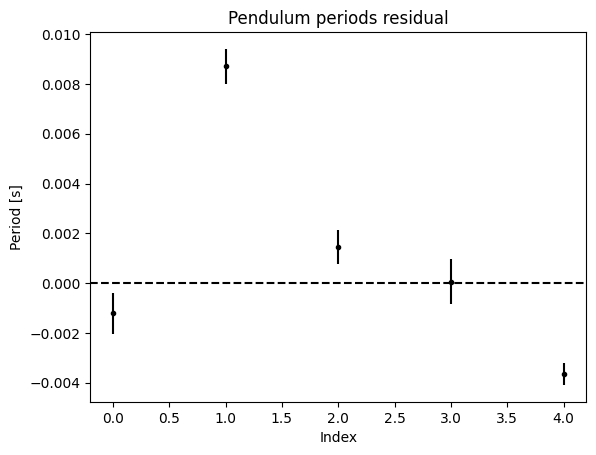

In [7]:
Tfit = cost.LeastSquares(np.arange(len(T)), T, sig_T, constant_fit)
Tfit = Minuit(Tfit, c = 10)
Tfit.migrad()
chi_T = Tfit.values[0]
chi_T_err = Tfit.errors[0]

residual = T - constant_fit(np.arange(len(T)), chi_T)
plt.errorbar(np.arange(len(T)), residual, yerr = sig_T, fmt=".k")
plt.axhline(y = 0, color = "black", linestyle = "--")
plt.title("Pendulum periods residual")
plt.ylabel("Period [s]")
plt.xlabel("Index")

/var/folders/lv/4tgtypmd2kg8ggv7vt0z73280000gn/T/ipykernel_50450/3428900437.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[0].legend(title="\n".join(fit_info), fontsize=18, title_fontsize = 18, alignment = 'center');


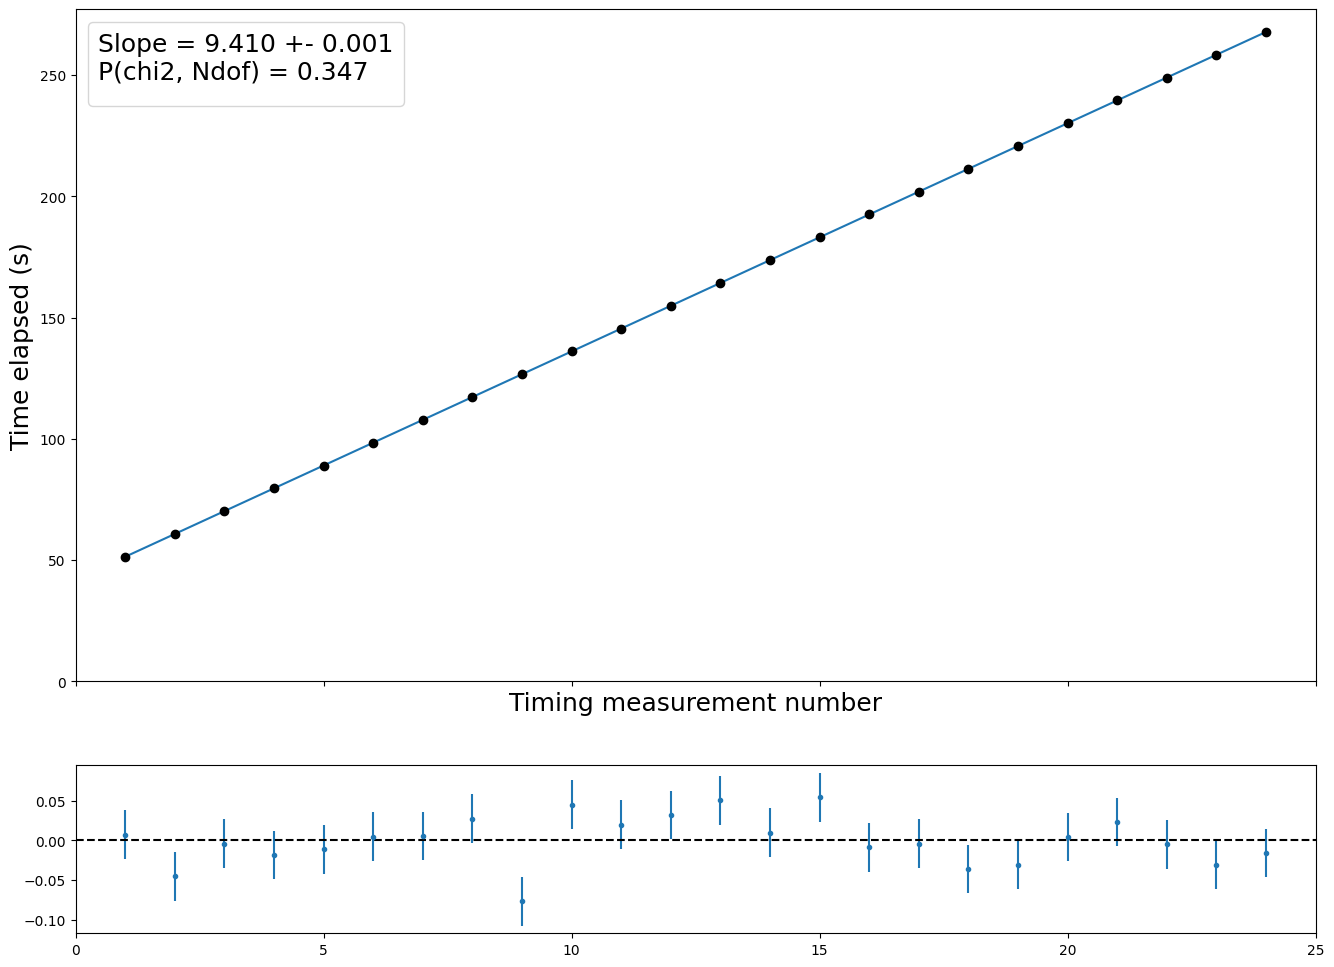

In [61]:
idx = 3
#Fitting
mfit = cost.LeastSquares(n[idx], t[idx], sig_t[idx], linear_fit)
mfit = Minuit(mfit, a = 10, b = 10)
mfit.migrad()
slope, const = mfit.values[:]
eslope, econst = mfit.errors[:]
p = stats.chi2.sf(mfit.fval, len(t[idx]) - len(mfit.values))

# Plotting
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(16, 12), gridspec_kw={'height_ratios':[4,1]}, sharex=True)
ax[0].errorbar(n[idx], t[idx], yerr=sig_t[idx], color='k', fmt='o')
ax[0].plot(n[idx], linear_fit(n[idx], slope, const))
ax[0].set_xlabel('Timing measurement number', fontsize=18)
ax[0].set_ylabel('Time elapsed (s)', fontsize=18)
ax[0].set(xlim=(0, n[idx][-1]+np.ediff1d(n[idx])[0]), ylim=(0, t[idx][-1]+np.ediff1d(t[idx])[0]))
fit_info = [f"Slope = {slope:.3f} +- {eslope:.3f}", f"P(chi2, Ndof) = {p:.3f}"]
ax[0].legend(title="\n".join(fit_info), fontsize=18, title_fontsize = 18, alignment = 'center');

residual = np.array(t[idx]) - linear_fit(np.array(n[idx]), slope, const)
ax[1].errorbar(n[idx], residual, yerr = sig_t[idx], fmt = ".")
ax[1].axhline(y = 0, linestyle = "--", color = "black")
#adding



/var/folders/lv/4tgtypmd2kg8ggv7vt0z73280000gn/T/ipykernel_50450/548179423.py:38: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[0].legend(title="\n".join(fit_info), fontsize=18, title_fontsize=18)


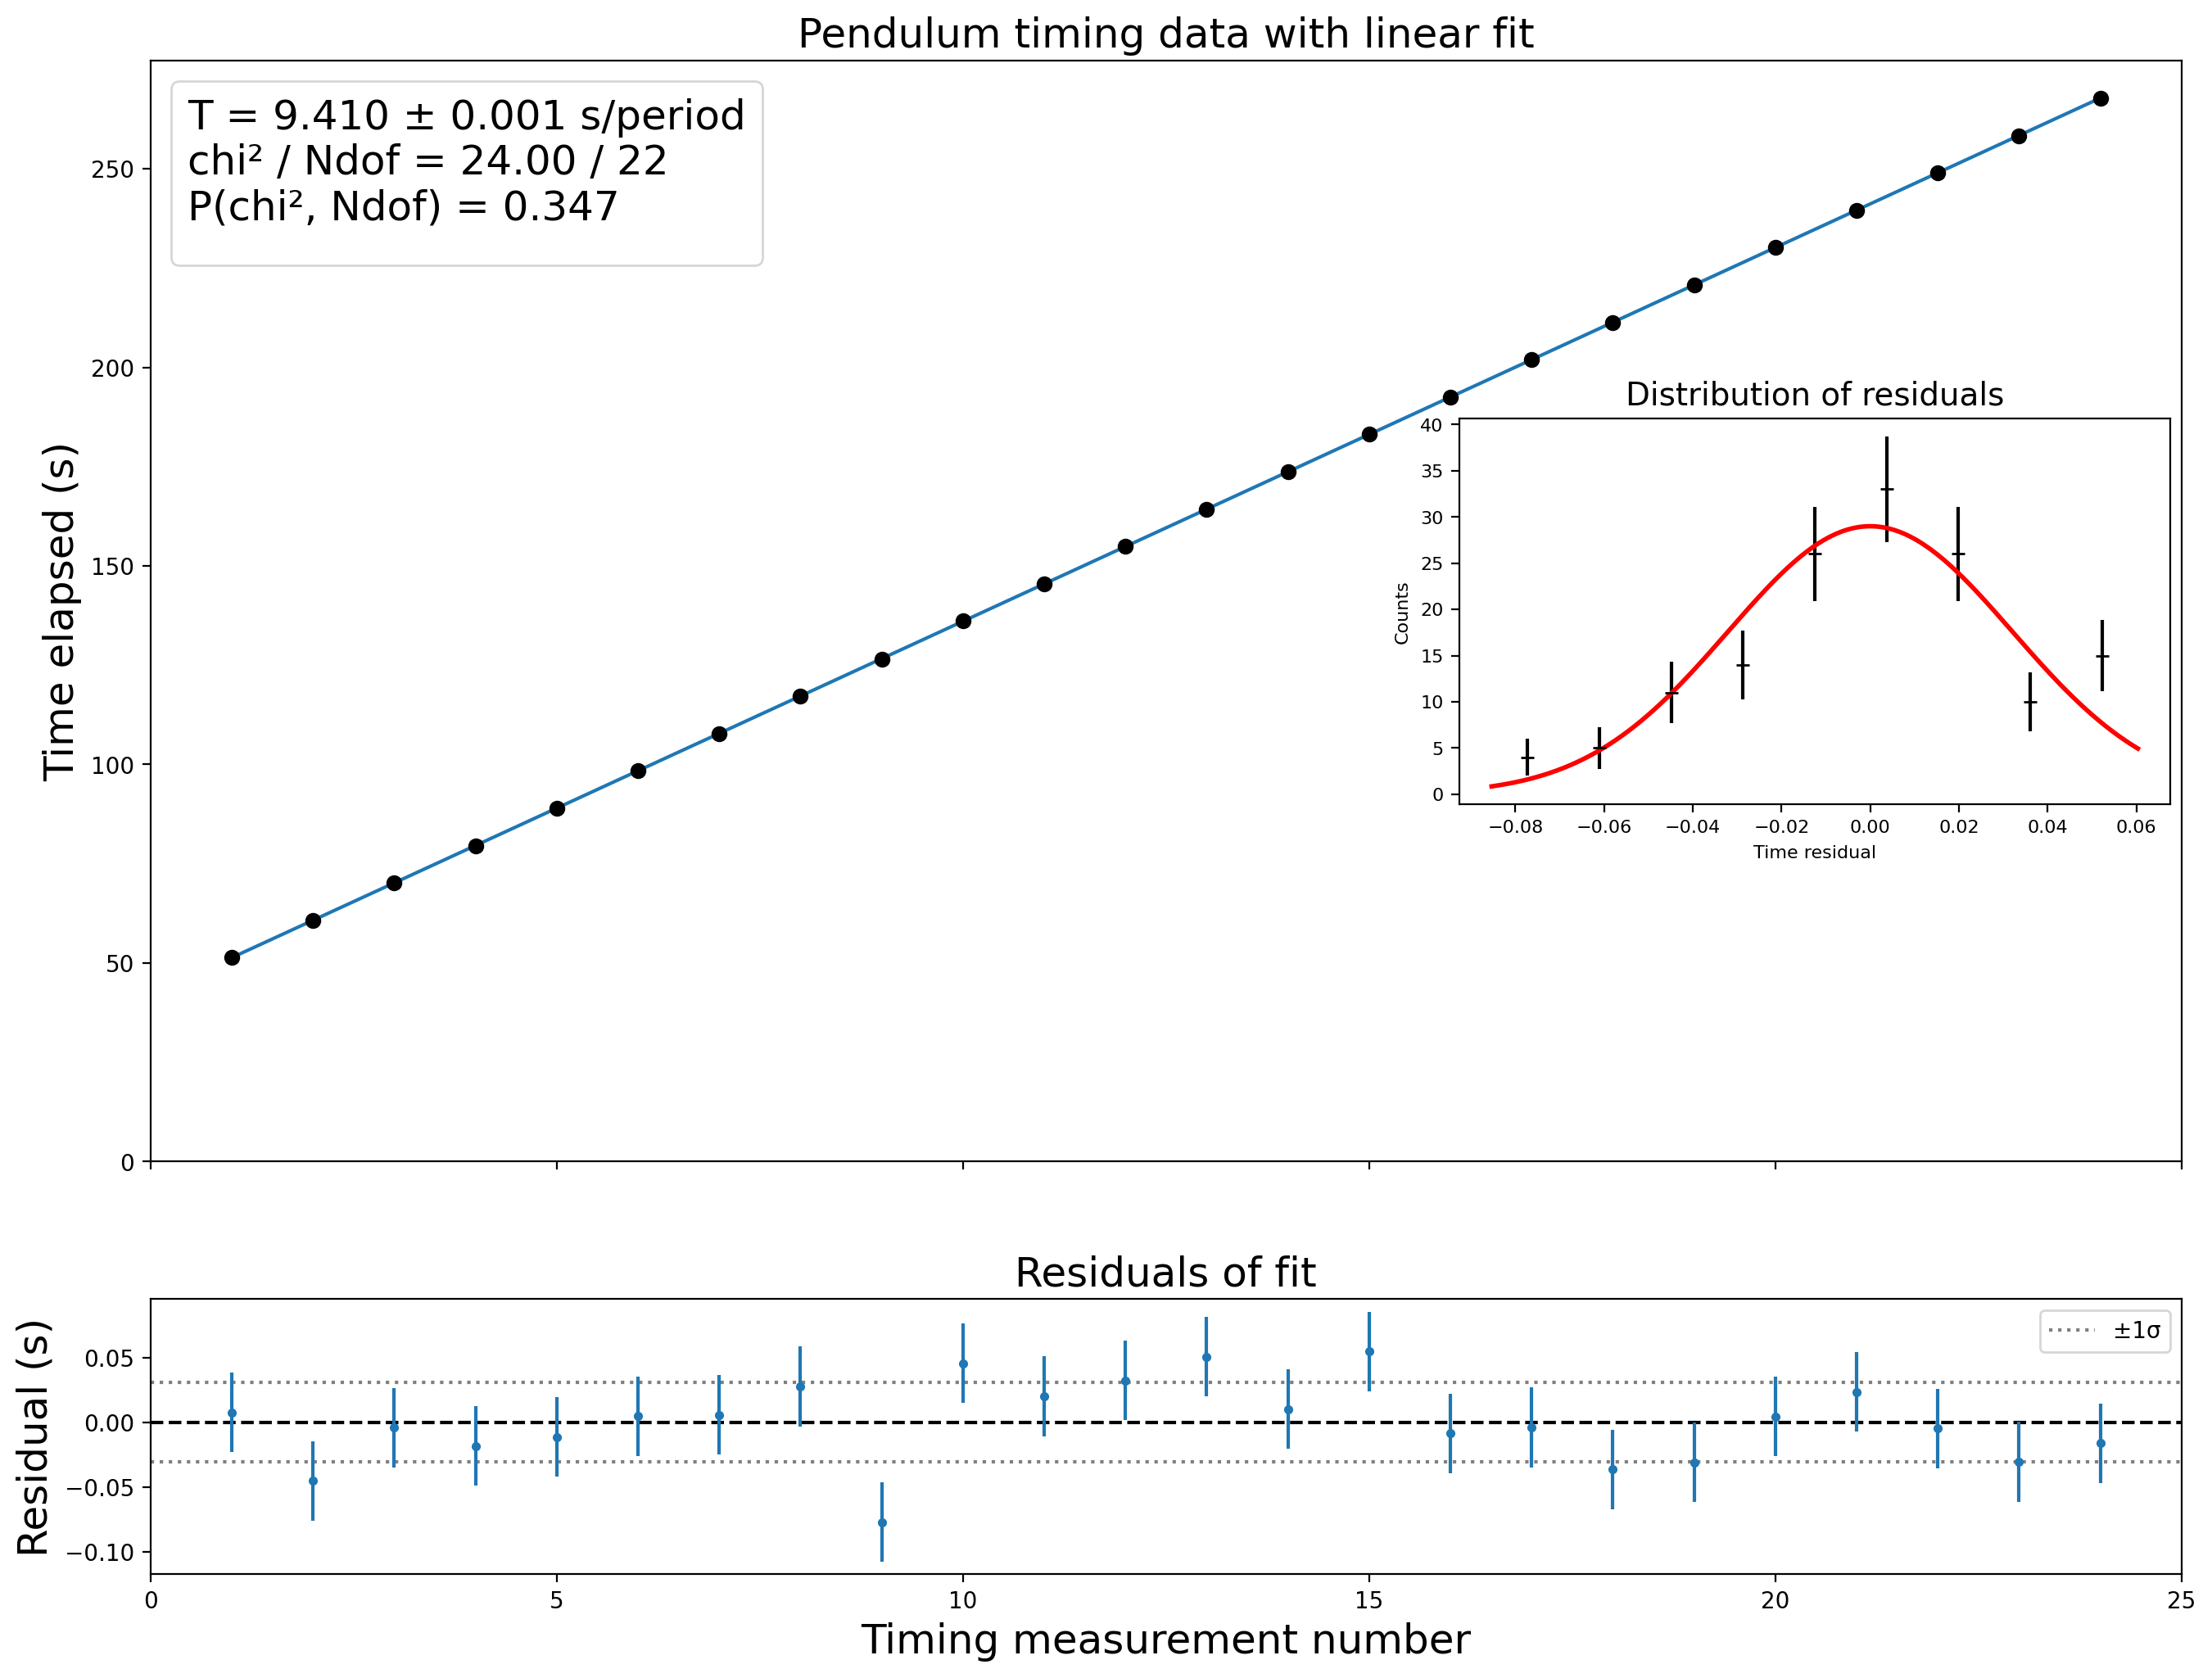

In [138]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from scipy.stats import norm
%config InlineBackend.figure_format = 'retina'
idx = 3

# --- Fitting ---
mfit = cost.LeastSquares(n[idx], t[idx], sig_t[idx], linear_fit)
mfit = Minuit(mfit, a = 10, b = 10)
mfit.migrad()

slope, const = mfit.values[:]
eslope, econst = mfit.errors[:]
p = stats.chi2.sf(mfit.fval, len(t[idx]) - len(mfit.values))

# --- Create figure ---
fig, ax = plt.subplots(
    nrows=2, ncols=1,
    figsize=(16, 12),
    gridspec_kw={'height_ratios':[4,1]},
    sharex=True
)

# --- Top: Data + fit ---
ax[0].errorbar(n[idx], t[idx], yerr=sig_t[idx], color='k', fmt='o')
ax[0].plot(n[idx], linear_fit(n[idx], slope, const))
# ax[0].set_xlabel('Timing measurement number', fontsize=18)
ax[0].set_ylabel('Time elapsed (s)', fontsize=18)
ax[0].set_title("Pendulum timing data with linear fit", fontsize=18)
ax[0].set(
    xlim=(0, n[idx][-1] + np.ediff1d(n[idx])[0]),
    ylim=(0, t[idx][-1] + np.ediff1d(t[idx])[0])
)
fit_info = [
    f"T = {slope:.3f} ± {eslope:.3f} s/period",
    f'chi² / Ndof = {mfit.fval:.2f} / {len(t[idx]) - len(mfit.values)}',
    f"P(chi², Ndof) = {p:.3f}"
]
ax[0].legend(title="\n".join(fit_info), fontsize=18, title_fontsize=18)

# --- Bottom: residuals ---
residual = np.array(t[idx]) - linear_fit(np.array(n[idx]), slope, const)


ax[1].axhline(y=0, linestyle='--', color='black')
ax[1].axhline(y=sig_t[idx], linestyle=':', color='gray',label='±1σ')
ax[1].axhline(y=-sig_t[idx], linestyle=':', color='gray')
ax[1].errorbar(n[idx], residual, yerr=sig_t[idx], fmt='.')
ax[1].set_ylabel("Residual (s)", fontsize=18)
ax[1].set_xlabel("Timing measurement number", fontsize=18)
ax[1].set_title("Residuals of fit", fontsize=18)
ax[1].legend()

# ---------------------------------------------------
#  ⭐ Add histogram inset in bottom-right corner
# ---------------------------------------------------

# Create inset axes: width = 35%, height = 85% of ax1
hist_ax = inset_axes(ax[0], width="35%", height="35%", loc="right")
residual = np.concatenate(residuals)
# Histogram of residuals
counts, bin_edges = np.histogram(residual, bins=9)
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])

hist_ax.errorbar(bin_centers, counts, yerr=np.sqrt(counts), fmt='_', color='black')

# Gaussian fit
mu, std = norm.fit(residual)
x = np.linspace(bin_edges[0], bin_edges[-1], 200)
pdf = norm.pdf(x, mu, std) * len(residual) * (bin_edges[1] - bin_edges[0])
hist_ax.plot(x, pdf, 'r-', lw=2)

# Cosmetic adjustments
hist_ax.set_title("Distribution of residuals", fontsize=14)
hist_ax.tick_params(labelsize=8)
hist_ax.set_xlabel("Time residual", fontsize=8)
hist_ax.set_ylabel("Counts", fontsize=8)


plt.show()

In [39]:
#flattening all residuals
all_residuals = np.concatenate(residuals)

AttributeError: module 'numpy' has no attribute 'flaten'

In [155]:
h_laser_arr = np.array([22.254,22.261,22.259,22.261,22.257])
h_laser = np.mean(h_laser_arr)
#The RMS is calculated with 1/(N−1) to take the low statistics into account.
h_laser_err = np.std(h_laser_arr, ddof=1)/np.sqrt(len(h_laser_arr))

h_tape_arr = np.array([22.1511, 22.1515])
h_tape = np.mean(h_tape_arr) - 0.03

h_tape_err = np.std(h_tape_arr, ddof=1)/np.sqrt(len(h_tape_arr))



length_lod_top, lod_top_err =[11.43e-2, 0.1150, 0.1149, 0.1145], [0.1e-2, 0.0001]
length_lod, lod_err =[2.98e-2, 0.0294, 0.0305, 0.0295], [0.1e-2, 0.0001]

l_pendulum_laser = h_laser - np.mean(length_lod_top) + 0.5*np.mean(length_lod)
l_pendulum_err_laser = np.sqrt(h_laser_err**2 + (np.std(length_lod_top)/np.sqrt(len(length_lod_top)))**2
                         + (0.5*np.std(length_lod)/np.sqrt(len(length_lod))**2))
l_pendulum_tape = h_tape - np.mean(length_lod_top) + 0.5*np.mean(length_lod)
l_pendulum_err_tape = np.sqrt(h_tape_err**2 + (np.std(length_lod_top)/np.sqrt(len(length_lod_top)))**2
                         + (0.5*np.std(length_lod)/np.sqrt(len(length_lod))**2))

print(f"Pendulum length Laser = {l_pendulum_laser:.3f} +- {l_pendulum_err_laser:.3f}")
print(f"Pendulum length Tape = {l_pendulum_tape:.3f} +- {l_pendulum_err_tape:.3f}")

# testing consistency of h measurements
n_sigmas = abs(h_laser - h_tape)/np.sqrt(h_laser_err**2 + h_tape_err**2)
print(f"Height measurements differ by {n_sigmas:.2f} sigma")

Pendulum length Laser = 22.159 +- 0.007
Pendulum length Tape = 22.022 +- 0.007
Height measurements differ by 102.19 sigma


In [156]:
err_laser = np.std(h_laser_arr, ddof=1)/np.sqrt(len(h_laser_arr))
err_tape  = np.std(h_tape_arr,  ddof=1)/np.sqrt(len(h_tape_arr))

h_vals = np.array([np.mean(h_laser_arr), np.mean(h_tape_arr)])
h_errs = np.array([err_laser, err_tape])
weights = 1/h_errs**2

h_mean = np.sum(weights*h_vals)/np.sum(weights)
chi2 = np.sum(((h_vals - h_mean)/h_errs)**2)
p = stats.chi2.sf(chi2, df=len(h_vals)-1)
print(f"Height mean = {h_mean:.4f} +- {np.sqrt(1/np.sum(weights)):.4f}, chi2 = {chi2:.2f}, p = {p:.4f}")

Height mean = 22.1537 +- 0.0002, chi2 = 6372.45, p = 0.0000


In [157]:
r = np.random
r.seed(42)
g_blind = r.normal(1, 1)
g = l_pendulum*(2*np.pi/chi_T)**2
# g = g + g_blind
print(l_pendulum_err, chi_T_err)
l_pendulum = l_pendulum_tape
l_pendulum_err = l_pendulum_err_tape
g_err = np.sqrt(((2*np.pi/chi_T)**2 * l_pendulum_err)**2 + (l_pendulum*8*np.pi**2/chi_T**3 * chi_T_err)**2)
print(f"g = {g:.3f} +- {g_err:.3f}")

0.007336552437556503 0.0002871006212602596
g = 9.827 +- 0.003


In [158]:
#testing consistency of T measurements using a chi2 test
from scipy import stats

x = np.array(T)       # values
sigma = np.array(sig_T)   # uncertainties
#deleting an outlier if wanted
idx_to_delete = []#[1,4]
x = np.delete(x, idx_to_delete)
sigma = np.delete(sigma, idx_to_delete)

w = 1/sigma**2
x_bar = np.sum(w * x) / np.sum(w)
sigma_xbar = 1/np.sqrt(np.sum(w))

chi2 = np.sum(((x - x_bar)/sigma)**2)
dof = len(x) - 1
p = stats.chi2.sf(chi2, dof)   # survival function = 1 - cdf

chi2_red = chi2/dof
#Birge scale factor
R_B = np.sqrt(chi2_red)
sigma_scaled = R_B * sigma
sigma_xbar_scaled = R_B * sigma_xbar

chi2_RB = np.sum(((x - x_bar)/sigma_scaled)**2)
dof_RB = len(x) - 1
p_RB = stats.chi2.sf(chi2_RB, dof_RB)   # survival function = 1 - cdf


print(f"weighted mean = {x_bar:.5g} ± {sigma_xbar:.2g}")
print(f'after scaling: {x_bar:.5g} ± {sigma_xbar_scaled:.2g}')
print(f"chi2 = {chi2:.2f}, dof = {dof}, chi2_red = {chi2_red:.2f}, p = {p:.3f}")
print(f"after scaling: chi2 = {chi2_RB:.2f}, dof = {dof_RB}, p = {p_RB:.3f}")



weighted mean = 9.4102 ± 0.00029
after scaling: 9.4102 ± 0.0022
chi2 = 230.12, dof = 4, chi2_red = 57.53, p = 0.000
after scaling: chi2 = 4.00, dof = 4, p = 0.406


In [159]:
l_pendulum = l_pendulum_tape
l_pendulum_err = l_pendulum_err_tape
# the calculation of g using the averaged T
T_weighted = x_bar
T_weighted_err = sigma_xbar_scaled
g = l_pendulum*(2*np.pi/T_weighted)**2
# g = g + g_blind
g_err = np.sqrt(((2*np.pi/T_weighted)**2 * l_pendulum_err)**2 + (l_pendulum*8*np.pi**2/T_weighted**3 * T_weighted_err)**2)
print(f"g = {g:.3f} +- {g_err:.3f}")

g = 9.818 +- 0.006


In [160]:
print(T_weighted)
print(T_weighted_err)

9.410235210425629
0.0021776397516214863


<ErrorbarContainer object of 3 artists>

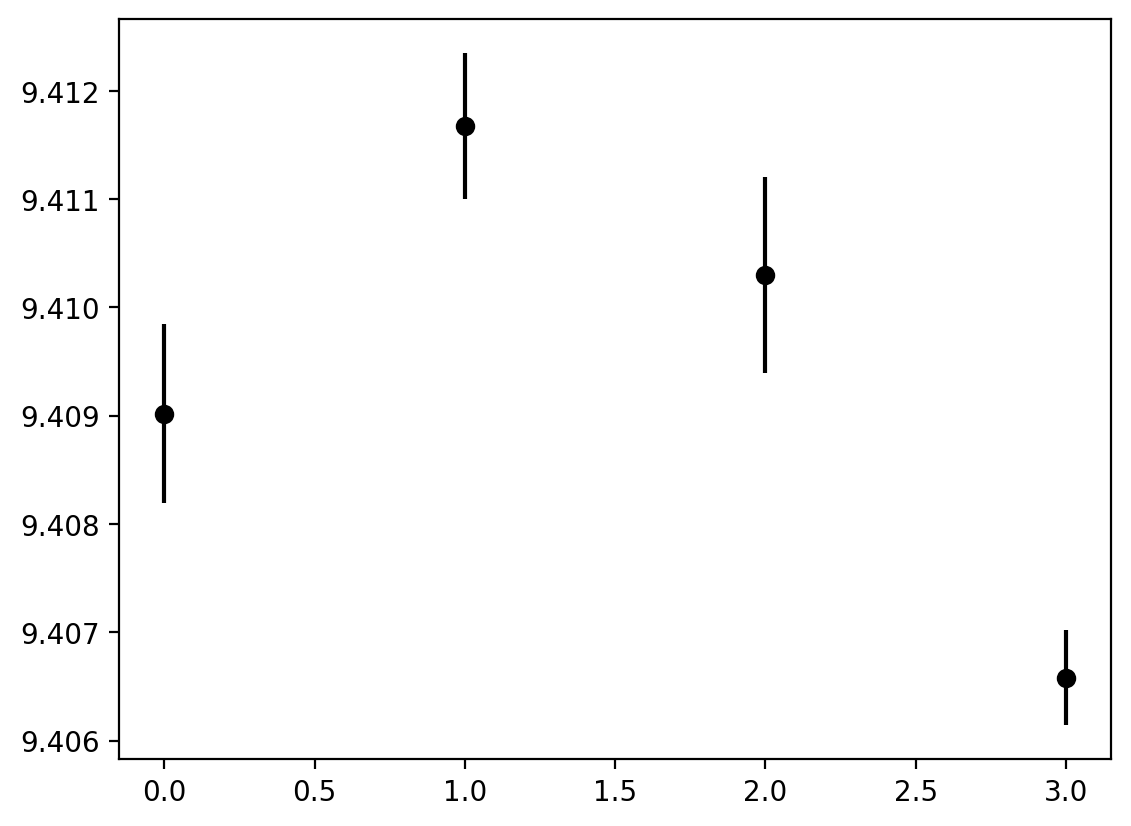

In [118]:
#plotting T values with errorbars
plt.errorbar(np.arange(len(x)), x, yerr=sigma, fmt='o', color='black')

In [93]:
# Separate periods
g = l_pendulum*(2*np.pi/T)**2
# g = g + g_blind
g_err = np.sqrt(((2*np.pi/T)**2 * l_pendulum_err)**2 + (l_pendulum*8*np.pi**2/T**3 * sig_T)**2)
print(f"g = {g} +- {g_err}")

g = [9.83353344 9.81282673 9.82798693 9.8308641  9.83863244] +- [0.00369818 0.00357776 0.00356118 0.00377858 0.00339884]


In [94]:
#taking the weighted average
g_weighted = np.average(g, weights = 1/(g_err**2))
g_weighted_err = np.sqrt(1.0/np.sum(1.0/g_err**2))
print(f"g weighted = {g_weighted:.3f} +- {g_weighted_err:.3f}")

g weighted = 9.829 +- 0.002


# What to do next?

The reason for the (empty) plot below is, that though your data (hopefully) lies on a line, you're not able to see any smaller effects. However, if you plot the __residuals__ (the difference between your measurements and a fit to them), then you will much better be able to tell, if the data looks good. Also, it is from a historgram of the residuals, that you can determine, if your errors are Gaussian (or have any obvious outliers), and from the Standard Deviation what your (typical) uncertainty is.